In [91]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
from collections import defaultdict
from collections import Counter
import numpy as np


In [34]:
df = pd.read_csv("../workflows/4_1_1_39/csv/4_1_1_39_uniprot.csv")

In [35]:
# Show all columns
pd.set_option('display.max_columns', None)

In [36]:
[print (x)for x in df.columns if "BRENDA_REFERENCES" not in x]


Entry
BRENDA_CL_DATA
BRENDA_CL_REFS
BRENDA_CR_DATA
BRENDA_CR_REFS
BRENDA_EN_DATA
BRENDA_EN_REFS
BRENDA_EN_COMMENT
BRENDA_IN_DATA
BRENDA_IN_REFS
BRENDA_IN_COMMENT
BRENDA_KM_CO2_DATA
BRENDA_KM
BRENDA_KM_CO2_UNITS
BRENDA_KM_CO2_REFS
BRENDA_KM_CO2_COMMENT
BRENDA_LO_DATA
BRENDA_LO_REFS
BRENDA_LO_COMMENT
BRENDA_ME_DATA
BRENDA_ME_REFS
BRENDA_ME_COMMENT
BRENDA_MW_DATA
BRENDA_MW_REFS
BRENDA_MW_COMMENT
BRENDA_NSP_DATA
BRENDA_NSP_REFS
BRENDA_NSP_COMMENT
BRENDA_PU_DATA
BRENDA_PU_REFS
BRENDA_SP_DATA
BRENDA_SP_REFS
BRENDA_SP_COMMENT
BRENDA_SU_DATA
BRENDA_SU_REFS
BRENDA_SU_COMMENT
BRENDA_SY_DATA
BRENDA_SY_REFS
BRENDA_SY_COMMENT
BRENDA_TN_CO2_DATA
BRENDA_TN
BRENDA_TN_CO2_UNITS
BRENDA_TN_CO2_REFS
BRENDA_TN_CO2_COMMENT
BRENDA_TN_D_ribulose_1,5_bisphosphate_DATA
BRENDA_TN_D_ribulose_1,5_bisphosphate_UNITS
BRENDA_TN_D_ribulose_1,5_bisphosphate_REFS
BRENDA_TN_D_ribulose_1,5_bisphosphate_COMMENT
BRENDA_TO_DATA
BRENDA_TO_REFS
BRENDA_TR_DATA
BRENDA_TR_REFS
BRENDA_TS_DATA
BRENDA_TS_REFS
BRENDA_TS_COMMENT
BREND

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Exclude the BRENDA references columns

In [14]:
df.loc[:,~df.columns.str.startswith('BRENDA_REFERENCES')]

,Entry,BRENDA_CL_DATA,BRENDA_CL_REFS,BRENDA_KM_DATA,BRENDA_KM_UNITS,BRENDA_KM_REFS,BRENDA_KM_COMMENT,BRENDA_MW_DATA,BRENDA_MW_REFS,BRENDA_MW_COMMENT,BRENDA_NSP_DATA,BRENDA_NSP_REFS,BRENDA_NSP_COMMENT,BRENDA_PU_DATA,BRENDA_PU_REFS,BRENDA_SP_DATA,BRENDA_SP_REFS,BRENDA_SP_COMMENT,BRENDA_SU_DATA,BRENDA_SU_REFS,BRENDA_SY_DATA,BRENDA_SY_REFS,BRENDA_SY_COMMENT,BRENDA_TS_DATA,BRENDA_TS_REFS,BRENDA_TS_COMMENT,BRENDA_LO_DATA,BRENDA_LO_REFS,BRENDA_SU_COMMENT,BRENDA_PHO_DATA,BRENDA_PHO_REFS,BRENDA_PHO_COMMENT,BRENDA_TO_DATA,BRENDA_TO_REFS,BRENDA_TO_COMMENT,BRENDA_EXP_DATA,BRENDA_EXP_REFS,BRENDA_EXP_COMMENT,BRENDA_CR_DATA,BRENDA_CR_REFS,Entry_name,Gene_names,Gene_names__primary_,Gene_names__synonym_,Gene_names__ordered_locus_,Gene_names__ORF_,Organism,Organism_ID,Protein_names,Sequence,Proteomes,Taxonomic_lineage_ALL,Virus_hosts,Fragment,Gene_encoded_by,Alternative_products_isoforms,Erroneous_gene_model_prediction,Erroneous_initiation,Erroneous_termination,Erroneous_translation,Frameshift,Mass_spectrometry,Polymorphism,RNA_editing,Sequence_caution,Length,Mass,Alternative_sequence,Natural_variant,Non_adjacent_residues,Non_standard_residue,Non_terminal_residue,Sequence_conflict,Sequence_uncertainty,Version_sequence,EC_number,Absorption,Catalytic_activity,ChEBI,ChEBI_Catalytic_activity,ChEBI_Cofactor,ChEBI_IDs,Cofactor,Function_[CC],Kinetics,Pathway,Redox_potential,Temperature_dependence,pH_dependence,Active_site,Binding_site,DNA_binding,Metal_binding,Nucleotide_binding,Site,Annotation,Features,Caution,Miscellaneous_[CC],Keywords,Protein_existence,Status,Subunit_structure_[CC],Interacts_with,Developmental_stage,Induction,Tissue_specificity,Gene_ontology_GO,Gene_ontology_biological_process,Gene_ontology_molecular_function,Gene_ontology_cellular_component,Gene_ontology_IDs,Allergenic_properties,Biotechnological_use,Disruption_phenotype,Involvement_in_disease,Pharmaceutical_use,Toxic_dose,Subcellular_location_[CC],Intramembrane,Topological_domain,Transmembrane,Post_translational_modification,Chain,Cross_link,Disulfide_bond,Glycosylation,Initiator_methionine,Lipidation,Modified_residue,Peptide,Propeptide,Signal_peptide,Transit_peptide,3D,Beta_strand,Helix,Turn,Mapped_PubMed_ID,PubMed_ID,Date_of_creation,Date_of_last_modification,Date_of_last_sequence_modification,Version_entry,Domain_[CC],Sequence_similarities,Protein_families,Coiled_coil,Compositional_bias,Domain_[FT],Motif,Region,Repeat,Zinc_finger,Taxonomic_lineage_all,Taxonomic_lineage_SUPERKINGDOM,Taxonomic_lineage_KINGDOM,Taxonomic_lineage_SUBKINGDOM,Taxonomic_lineage_SUPERPHYLUM,Taxonomic_lineage_PHYLUM,Taxonomic_lineage_SUBPHYLUM,Taxonomic_lineage_SUPERCLASS,Taxonomic_lineage_CLASS,Taxonomic_lineage_SUBCLASS,Taxonomic_lineage_INFRACLASS,Taxonomic_lineage_SUPERORDER,Taxonomic_lineage_ORDER,Taxonomic_lineage_SUBORDER,Taxonomic_lineage_INFRAORDER,Taxonomic_lineage_PARVORDER,Taxonomic_lineage_SUPERFAMILY,Taxonomic_lineage_FAMILY,Taxonomic_lineage_SUBFAMILY,Taxonomic_lineage_TRIBE,Taxonomic_lineage_SUBTRIBE,Taxonomic_lineage_GENUS,Taxonomic_lineage_SUBGENUS,Taxonomic_lineage_SPECIES_GROUP,Taxonomic_lineage_SPECIES_SUBGROUP,Taxonomic_lineage_SPECIES,Taxonomic_lineage_SUBSPECIES,Taxonomic_lineage_VARIETAS,Taxonomic_lineage_FORMA,Cross_reference_ABCD,Cross_reference_Allergome,Cross_reference_Antibodypedia,Cross_reference_ArachnoServer,Cross_reference_Araport,Cross_reference_Bgee,Cross_reference_BindingDB,Cross_reference_BioCyc,Cross_reference_BioGRID,Cross_reference_BioGRID_ORCS,Cross_reference_BioMuta,Cross_reference_BMRB,Cross_reference_BRENDA,Cross_reference_CarbonylDB,Cross_reference_CAZy,Cross_reference_CCDS,Cross_reference_CDD,Cross_reference_CGD,Cross_reference_ChEMBL,Cross_reference_ChiTaRS,Cross_reference_CLAE,Cross_reference_CollecTF,Cross_reference_ComplexPortal,Cross_reference_COMPLUYEAST_2DPAGE,Cross_reference_ConoServer,Cross_reference_CORUM,Cross_reference_CPTAC,Cross_reference_CPTC,Cross_reference_CTD,Cross_reference_dbSNP,Cross_reference_DDBJ,Cross_reference_DEPOD,Cross_reference

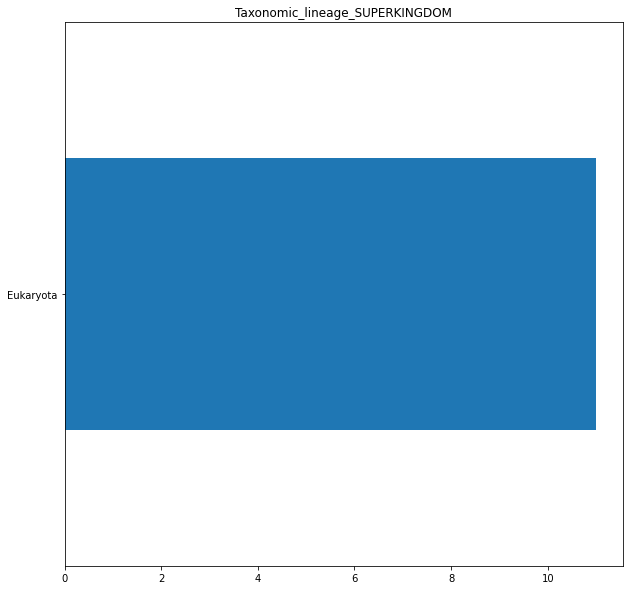

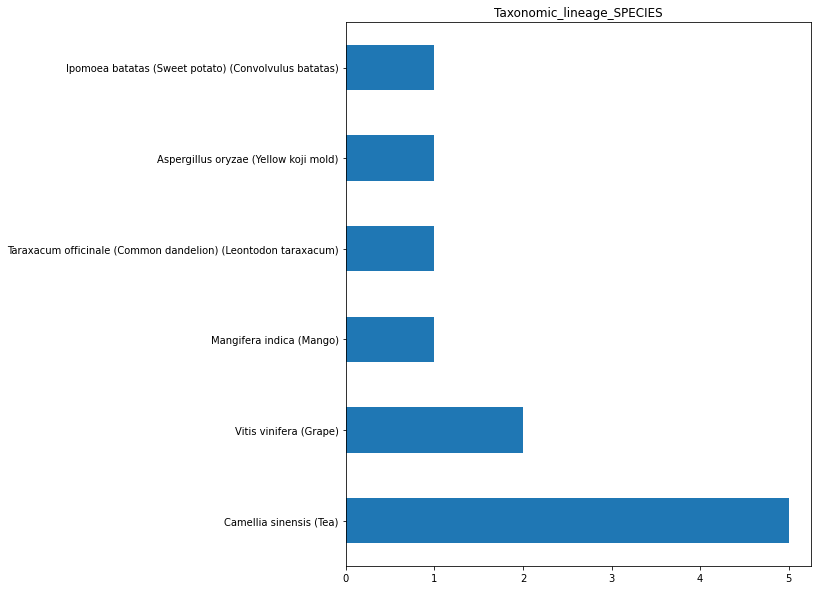

In [5]:
taxonomy_cols = ['Taxonomic_lineage_SUPERKINGDOM', 'Taxonomic_lineage_SPECIES']

for col in taxonomy_cols:
    fig, ax = plt.subplots(figsize=(len(col) / 3 ,10))
    chart = df[col].value_counts().plot.barh(title=col, ax=ax)
    plt.show()

# Load in multiple files and check to see how many entries

In [6]:
for ec_num in ['1_10_3_1', '2_7_1_143', '7_3_2_6']:
    path =  f"../workflows/{ec_num}/csv/{ec_num}_uniprot.csv"
    
    if os.path.exists(path):
        df = pd.read_csv(path)
        print (f"{ec_num} has {len(df)} total UniProt entries")
    else:
        print (f"{ec_num} has no matching UniProt entries")

1_10_3_1 has 11 total UniProt entries
2_7_1_143 has no matching UniProt entries
7_3_2_6 has 7 total UniProt entries


# Steps

### Load notebooks / read in files
### Summarise the ten data sets with the most sequences
- Which columns have the most entries
- Which columns are uninformative

Importing data set 

- Iterate through every EC file and check how many entries there are
- Save the EC numbers of the 10 largest files 

In [70]:
#ec_nums = pd.read_csv("../ec_nums.csv")

sys.path.append('../config')

import ec_nums

#grabs the list containing all ec nums 
ec_files = ec_nums.ec_nums

ec_uniprot_counts = {}

for num in ec_files:
    num = num.replace('.','_')

    path =  f"../workflows/{num}/csv/{num}_uniprot.csv"
    
    if os.path.exists(path):
        df = pd.read_csv(path) 
        
        ec_uniprot_counts[num] = df.shape[0]

sorted_ec_counts = sorted(ec_uniprot_counts.items(),key =lambda x: x[1], reverse=True)


print(sorted_ec_counts[0:10])

       
        
        
    
        

[('2_7_11_1', 335), ('2_7_13_3', 297), ('2_7_10_2', 203), ('2_7_10_1', 180), ('1_14_99_39', 175), ('2_5_1_18', 147), ('3_2_1_8', 133), ('3_5_2_6', 129), ('1_15_1_1', 117), ('4_1_1_39', 114)]


# The top 10 EC groups

2_7_11_1: non-specific serine/threonine protein kinase

2_7_13_3: histidine kinase

2_7_10_2: non-specific protein-tyrosine kinase

2_7_10_1: receptor protein-tyrosine kinase

1_14_99_39: ammonia monooxygenase

2_5_1_18: glutathione transferase

3_2_1_8: endo-1,4-beta-xylanase (degrade the linear polysaccharide xylan into xylose - cell wall component)

3_5_2_6: beta-lactamase

1_15_1_1: superoxide dismutase

4_1_1_39: ribulose-bisphosphate carboxylase


# Filter relevent columns

- begin to filter out columns with irrelevant information 

Possible columns of interest:
- Km value
- Pfam classification 



In [4]:
ec_top_10 = ['2_7_11_1', '2_7_13_3', '2_7_10_2', '2_7_10_1', '1_14_99_39', '2_5_1_18', '3_2_1_8', '3_5_2_6', '1_15_1_1', '4_1_1_39']

# 1) Pfam value

- Classifies a collection of protein domain families 
- Entries with less than 6 entries get classed within other 

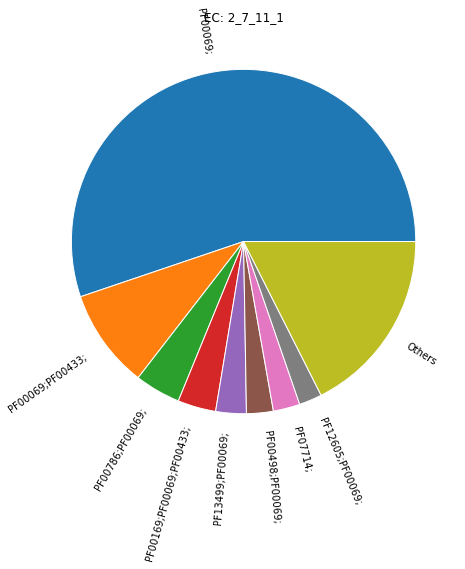

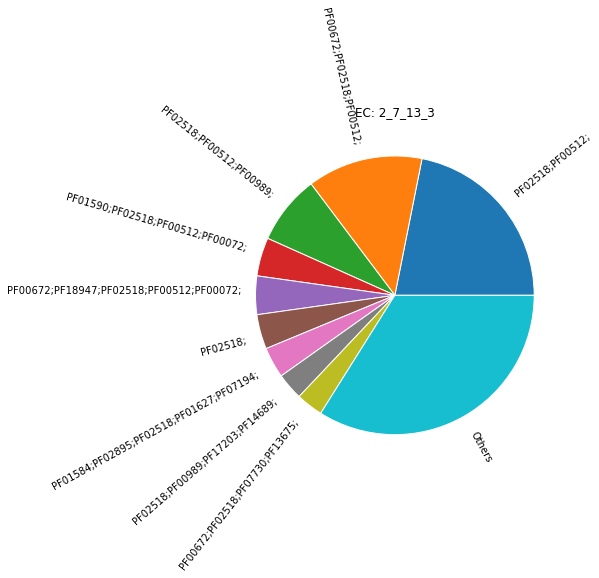

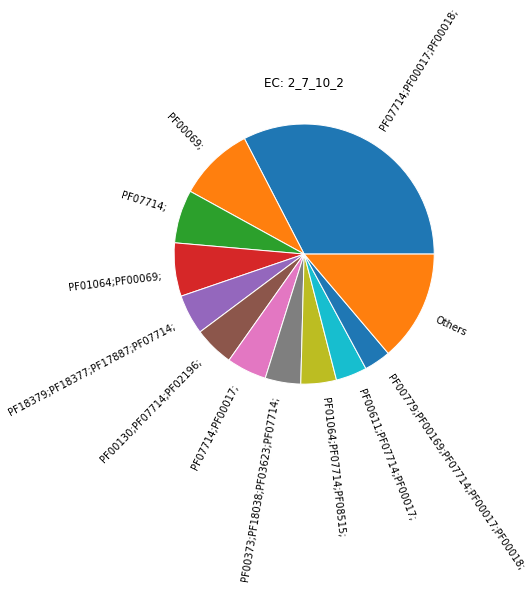

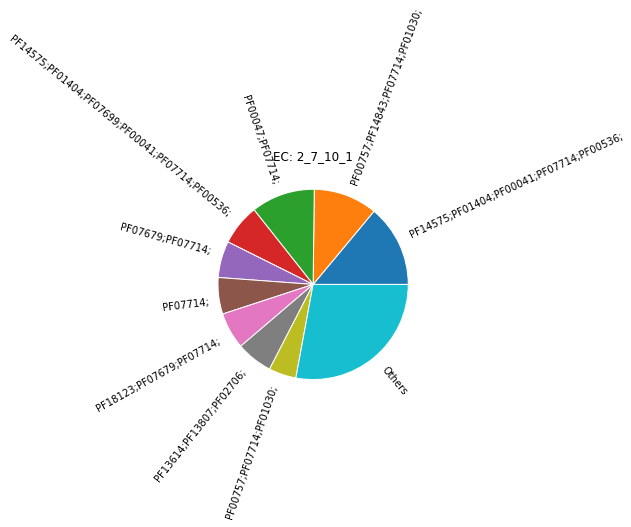

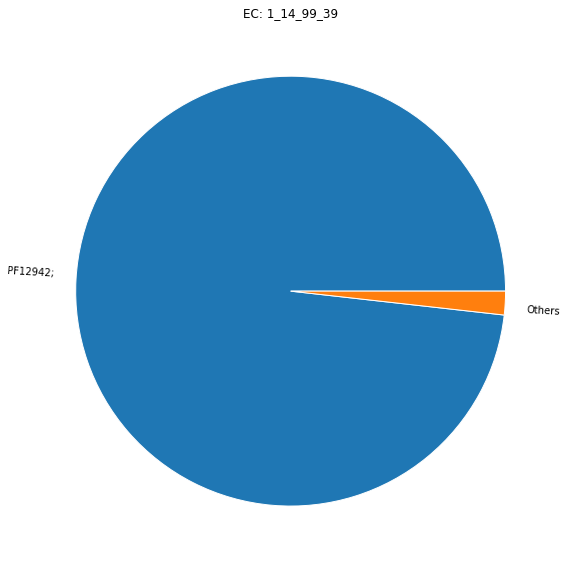

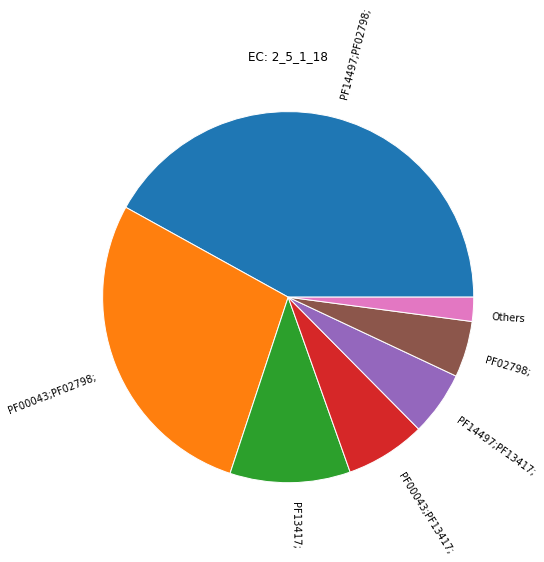

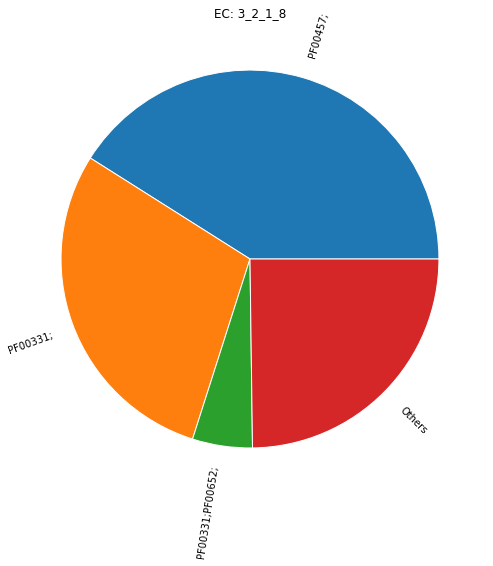

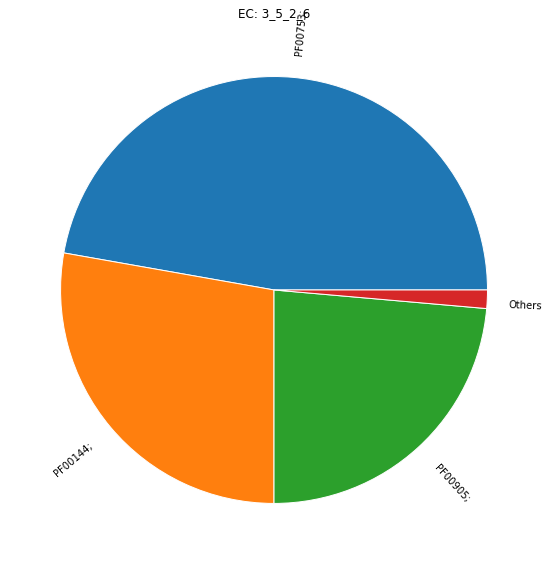

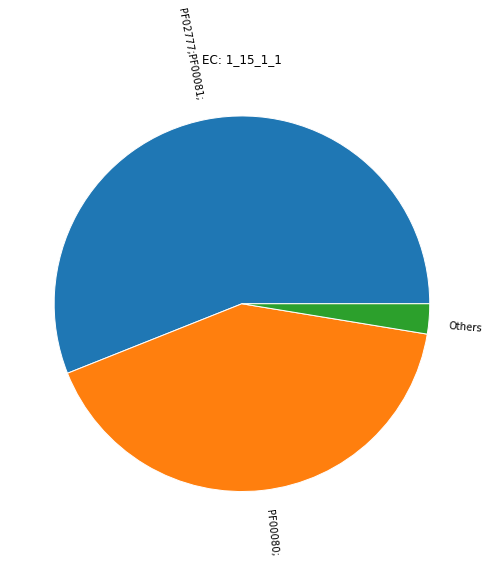

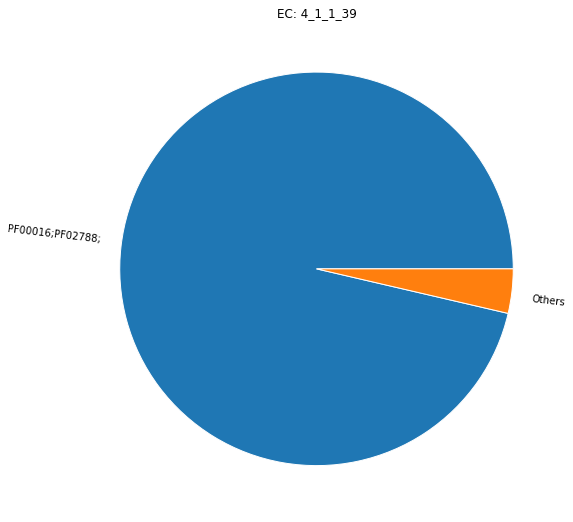

In [123]:
enzyme_cols = ['Entry', 'Cross_reference_Pfam']


for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    
    #will count each appearance of particular pfam class 
    counters = defaultdict(int)
    df = df[enzyme_cols]
    pfam_counts = df['Cross_reference_Pfam'].value_counts()

    for index, value in pfam_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 


    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(counters.values(), labels = counters.keys(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},rotatelabels = 45)
    ax.set_title(f'EC: {ec}')
    plt.tight_layout()

# 2) pH optimum value

- the pH at which the enzyme is most active

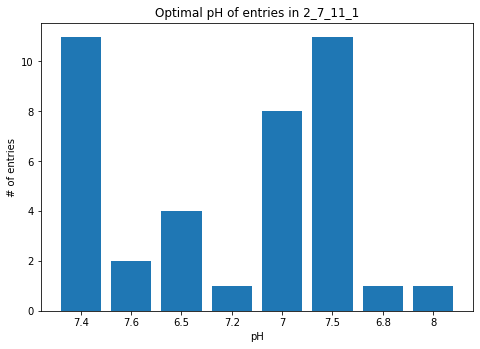

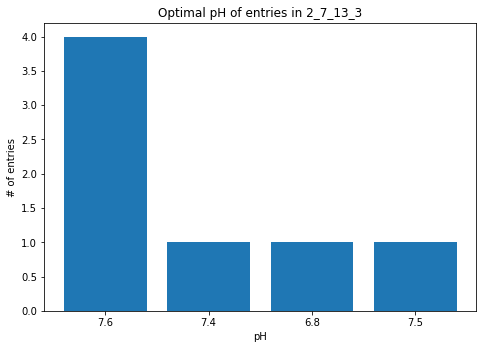

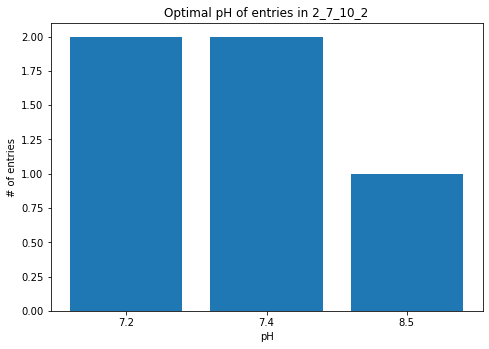

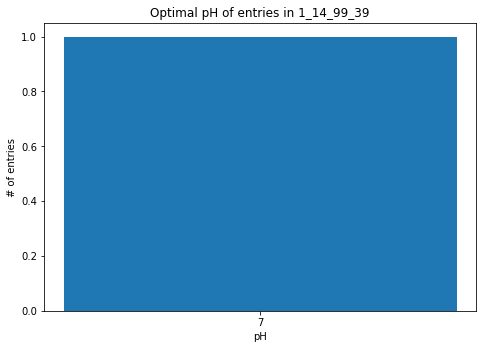

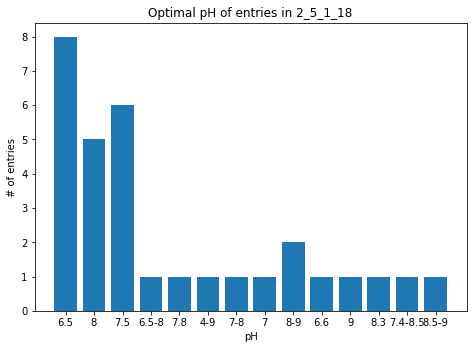

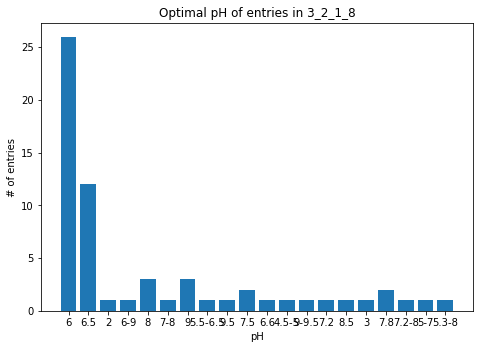

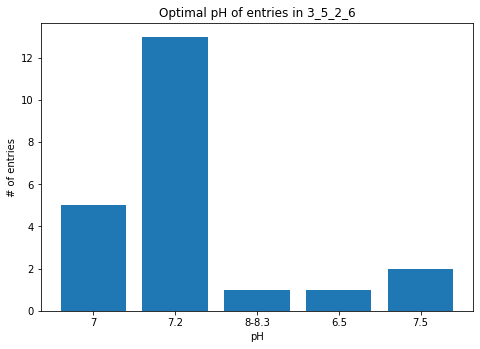

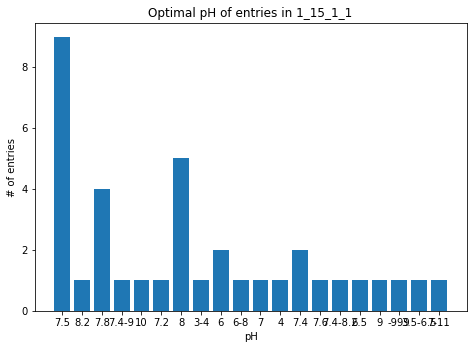

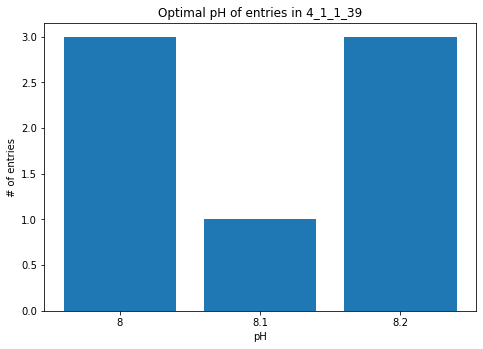

In [108]:
enzyme_cols = ['Entry', 'BRENDA_PHO_DATA']


for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    
    if 'BRENDA_PHO_DATA' not in df.columns:
        continue 
    
    df = df[enzyme_cols].dropna()

    ls = df.values.tolist()

    pH_counter = {}

    for entry in ls:

        #separate actual pH from reference count in data 
        pH = entry[1].split('_')[0]

        if pH in pH_counter:
            pH_counter[pH].append(entry[0])
        else:
            #create an entry and add a list with annotation name 
            pH_counter[pH] = [entry[0]]


    keys = list(pH_counter.keys())

    values = list(pH_counter.values())

    pH_counts = []

    for x in values:
        pH_counts.append(len(x))


    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(keys, pH_counts)
    ax.set_xlabel('pH')
    ax.set_ylabel('# of entries')
    ax.set_title(f'Optimal pH of entries in {ec}')
    plt.show()


